In [1]:
import pandas as pd
from pandas_datareader import data as web

In [2]:
pip install mplfinance

     |████████████████████████████████| 61kB 3.3MB/s 


In [3]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import matplotlib.dates as mpl_dates
import numpy
from datetime import date
import seaborn as sns

In [4]:
stocks = ['ACC.NS', 'ABBOTINDIA.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANITRANS.NS', 'ALKEM.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AUROPHARMA.NS', 'DMART.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BERGEPAINT.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BIOCON.NS', 'BOSCHLTD.NS', 'BRITANNIA.NS', 'CADILAHC.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COLPAL.NS', 'CONCOR.NS', 'DLF.NS', 'DABUR.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GAIL.NS', 'GICRE.NS', 'GODREJCP.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HAVELLS.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HDFC.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'ITC.NS', 'IOC.NS', 'IGL.NS', 'INDUSTOWER.NS', 'INDUSINDBK.NS', 'NAUKRI.NS', 'INFY.NS', 'INDIGO.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LTI.NS', 'LT.NS', 'LUPIN.NS', 'M&M.NS', 'MARICO.NS', 'MARUTI.NS', 'MOTHERSUMI.NS', 'MUTHOOTFIN.NS', 'NMDC.NS', 'NTPC.NS', 'NESTLEIND.NS', 'ONGC.NS', 'OFSS.NS', 'PETRONET.NS', 'PIDILITIND.NS', 'PEL.NS', 'PFC.NS', 'POWERGRID.NS', 'PGHH.NS', 'PNB.NS', 'RELIANCE.NS', 'SBICARD.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SIEMENS.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'UPL.NS', 'ULTRACEMCO.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'WIPRO.NS']

In [5]:
def find_ema(ema,percent=1):
    l = []
    for s in stocks:
        df = web.DataReader(s, data_source='yahoo', start=('01-Oct-2019'))
        ema_short3 = df.Close.ewm(span=ema, adjust=False).mean()
        for i in range(-1,-6,-1):
            if (ema_short3[i]-(ema_short3[i]*0.01*percent))<df.Close[i]<(ema_short3[i]+(ema_short3[i]*0.01*percent)):
                l.append(s)
                break
    return l

In [6]:
def plot_chart(stocks,date='01-Oct-2019',t='line'):
    if t=='c':
        t='candlestick'
    for p in stocks:
        df = web.DataReader(p, data_source='yahoo', start=(date))
        mc = mpf.make_marketcolors(up='#00675b',down='#d50000',edge='inherit',wick='inherit',volume='inherit')
        s  = mpf.make_mpf_style(marketcolors=mc,y_on_right=True,gridstyle='-')
        ema_short1 = df.Close.ewm(span=10, adjust=False).mean()
        ema_short2 = df.Close.ewm(span=50, adjust=False).mean()
        ema_short3 = df.Close.ewm(span=100, adjust=False).mean()
        ema_short4 = df.Close.ewm(span=200, adjust=False).mean()
        apdict = [mpf.make_addplot(ema_short1),mpf.make_addplot(ema_short2),mpf.make_addplot(ema_short3),mpf.make_addplot(ema_short4)]
        fig, axes = mpf.plot(df,title=p[:-3], type=t,style=s,volume=True, no_xgaps = True,figratio=(38,25),datetime_format='%d-%m',figscale=1.5,addplot=apdict,returnfig=True)
        mav_titles=["Price","EMA1",'EMA2','EMA3','EMA4']
        axes[0].legend(mav_titles)

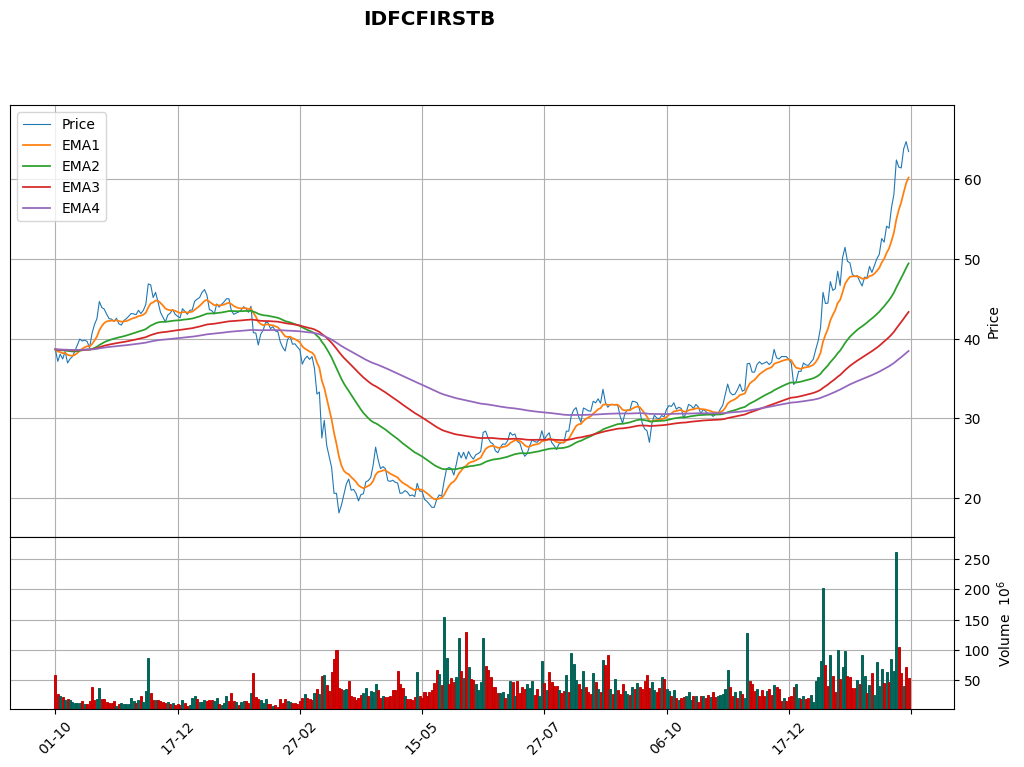

In [7]:
plot_chart(['IDFCFIRSTB.NS'])